# PSI - Population Stability Index
Vinícius Trevisan 2022

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data prep
from sklearn.model_selection import train_test_split

In [3]:
# Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

In [4]:
# Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Functions

In [5]:
def evaluate_regression(y, y_pred):
    
    '''
    Prints the most common evaluation metrics for regression
    '''
    
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)
    
    print('Regression result')
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")

In [6]:
def evaluate_classification(y, y_proba, threshold = 0.5):
    
    '''
    Prints the most common evaluation metrics for regression
    '''
    y_pred = [1 if y > threshold else 0 for y in y_proba]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)
    
    print('Classification result')
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1:        {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")

## Regressor

I will train a regressor with a synthetic dataset in a manner that:

$$y = a_1 \cdot x_1 + a_2 \cdot x_2 + a_3 \cdot x_3 + b$$

The features $x_1$, $x_2$ and $x_3$ will be sampled from different distributions and $y$ will be calculated for the train and test sets.

Then, I will create new features $z_1$, $z_2$ and $z_3$ which are the same features as before, but sampled with a slight deviation on $x_2$ to create $z_2$ and a large deviation on $x_3$ to create $z_3$. The feature $z_1$ will come from exactly the same distribution as $x_1$.

### Create Synthetic Dataset

In [7]:
# Sample size 
size = 5000

In [8]:
# Create random samples
x1 = np.random.normal(loc = 0, scale = 2, size = size)
x2 = np.random.normal(loc = 3, scale = 1, size = size)
x3 = np.random.normal(loc = 5, scale = 2, size = size)

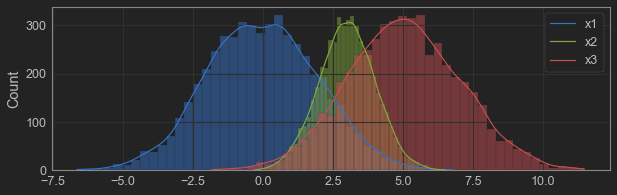

In [9]:
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(x1, kde = True, color = 'b')
sns.histplot(x2, kde = True, color = 'g')
sns.histplot(x3, kde = True, color = 'r')
plt.legend(["x1", "x2", "x3"])

In [10]:
# Create random samples
z1 = np.random.normal(loc = 0, scale = 2, size = size)  # The same as x1
z2 = np.random.normal(loc = 3.5, scale = 0.75, size = size)  # x2 with slight changes on scale and loc
z3 = np.random.normal(loc = 8, scale = 3, size = size)  # x3 with large changes on scale and loc

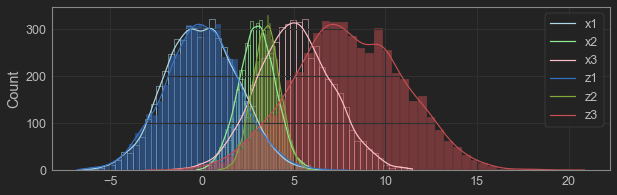

In [11]:
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(x1, kde = True, color = 'lightblue', fill = False)
sns.histplot(x2, kde = True, color = 'lightgreen', fill = False)
sns.histplot(x3, kde = True, color = 'pink', fill = False)
sns.histplot(z1, kde = True, color = 'b')
sns.histplot(z2, kde = True, color = 'g')
sns.histplot(z3, kde = True, color = 'r')
plt.legend(["x1", "x2", "x3", "z1", "z2", "z3"])

### Prepare train and test data

In [12]:
# yes, a2 = pi, a3 = e and b = phi
y = [-2*x1 + 3.1415*x2 + 2.7183*x3 + 1.6180 for (x1, x2, x3) in zip(x1,x2,x3)]

<AxesSubplot:>

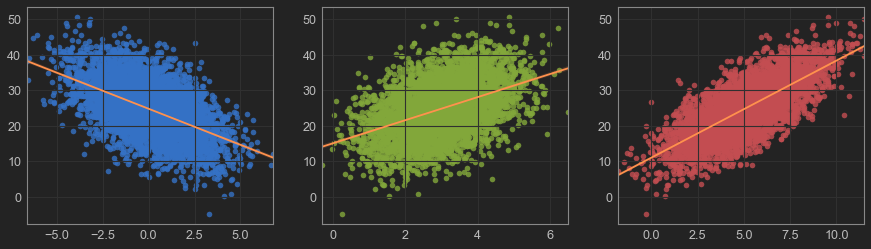

In [13]:
plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.regplot(x = x1, y = y, ax = ax1, scatter_kws={"color": "b"}, line_kws={"color": "y"})
sns.regplot(x = x2, y = y, ax = ax2, scatter_kws={"color": "g"}, line_kws={"color": "y"})
sns.regplot(x = x3, y = y, ax = ax3, scatter_kws={"color": "r"}, line_kws={"color": "y"})

In [14]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y' : y})
X = df.drop(columns = 'y')
y = df['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Train the regressor

In [16]:
model = ElasticNet()

In [17]:
model.fit(X_train, y_train)

ElasticNet()

In [18]:
y_pred = model.predict(X_test)

In [19]:
evaluate_regression(y_test, y_pred)

Regression result
MAE:  1.3215
MSE:  2.7159
RMSE: 1.6480
R2:   0.9480


### Predicts the shifted data

In [20]:
Z = pd.DataFrame({'x1': z1, 'x2': z2, 'x3': z3})

In [21]:
z_pred = model.predict(Z)

<AxesSubplot:>

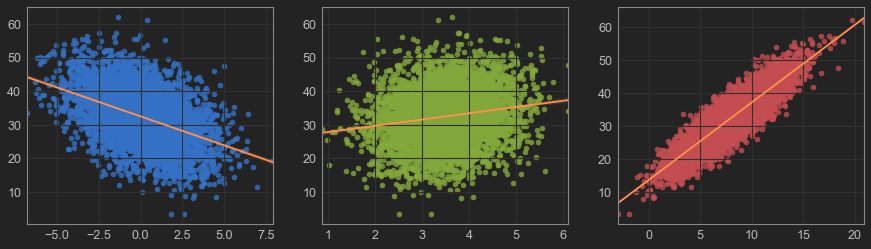

In [22]:
plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.regplot(x = z1, y = z_pred, ax = ax1, scatter_kws={"color": "b"}, line_kws={"color": "y"})
sns.regplot(x = z2, y = z_pred, ax = ax2, scatter_kws={"color": "g"}, line_kws={"color": "y"})
sns.regplot(x = z3, y = z_pred, ax = ax3, scatter_kws={"color": "r"}, line_kws={"color": "y"})

### Calculates the PSI

In [23]:
def psi(score_initial, score_new, num_bins = 10, mode = 'fixed'):
    
    eps = 1e-4
    
    # Sorts the data
    score_initial.sort()
    score_new.sort()
    
    # Prepare the bins
    min_val = min(min(score_initial), min(score_new))
    max_val = max(max(score_initial), max(score_new))
    if mode == 'fixed':
        bins = [min_val + (max_val - min_val)*(i)/num_bins for i in range(num_bins+1)]
    elif mode == 'quantile':
        bins = pd.qcut(score_initial, q = num_bins, retbins = True)[1] # Create the quantiles based on the initial population
    else:
        raise ValueError(f"Mode \'{mode}\' not recognized. Your options are \'fixed\' and \'quantile\'")
    bins[0] = min_val - eps # Corrects the lower boundary
    bins[-1] = max_val + eps # Corrects the higher boundary
        
        
    # Bucketize the initial population and count the sample inside each bucket
    bins_initial = pd.cut(score_initial, bins = bins, labels = range(1,num_bins+1))
    df_initial = pd.DataFrame({'initial': score_initial, 'bin': bins_initial})
    grp_initial = df_initial.groupby('bin').count()
    grp_initial['percent_initial'] = grp_initial['initial'] / sum(grp_initial['initial'])
    
    # Bucketize the new population and count the sample inside each bucket
    bins_new = pd.cut(score_new, bins = bins, labels = range(1,num_bins+1))
    df_new = pd.DataFrame({'new': score_new, 'bin': bins_new})
    grp_new = df_new.groupby('bin').count()
    grp_new['percent_new'] = grp_new['new'] / sum(grp_new['new'])
    
    # Compares the bins to calculate PSI
    psi_df = grp_initial.join(grp_new, on = "bin", how = "inner")
    
    # Adds a small value for when the percent is zero
    psi_df['percent_initial'] = psi_df['percent_initial'].apply(lambda x: eps if x == 0 else x)
    psi_df['percent_new'] = psi_df['percent_new'].apply(lambda x: eps if x == 0 else x)
    
    # Calculates the psi
    psi_df['psi'] = (psi_df['percent_initial'] - psi_df['percent_new']) * np.log(psi_df['percent_initial'] / psi_df['percent_new'])
    
    # Returns the psi values
    return psi_df['psi'].values

#### Using fixed size bins

In [24]:
psi_values_fixed = psi(y_pred, z_pred, mode = 'fixed')

In [25]:
psi_values_fixed

array([0.00164932, 0.04448402, 0.16883253, 0.22246303, 0.00228268,
       0.20045703, 0.5168593 , 0.3347451 , 0.04114828, 0.0027334 ])

In [26]:
np.mean(psi_values_fixed)

0.15356546850940028

#### Using quantile bins

In [27]:
psi_values_quantile = psi(y_pred, z_pred, mode = 'quantile')

In [28]:
psi_values_quantile

array([0.07748153, 0.09638744, 0.08570467, 0.09320446, 0.07000265,
       0.03465736, 0.01751834, 0.00118899, 0.00400303, 0.65536801])

In [29]:
np.mean(psi_values_quantile)

0.11355164864833103

#### Saves the data for the CSI example

In [30]:
df_test = X_test.copy()
df_test['y'] = y_test
df_test['pred'] = y_pred

In [31]:
Z['pred'] = z_pred

In [32]:
df_test.to_csv("data_test_regression.csv", sep = ";", index = False)
Z.to_csv("Z_regression.csv", sep = ";", index = False)

## Classifier

I will train a classifier with a synthetic dataset in a manner that:

$$
y = 
\left\{ 
  \begin{array}{ c l }
    \ 1 & \quad \textrm{if } (a_1 \cdot x_1 + a_2 \cdot x_2 + a_3 \cdot x_3 + b) \gt c \\
    0 & \quad \textrm{otherwise}
  \end{array}
\right.$$

The features $x_1$, $x_2$, $x_3$, $z_1$, $z_2$, and $z_3$ will be the same ones as from the regression example.

### Prepare train and test data

In [33]:
# yes, a2 = pi, a3 = e and b = phi
y = [-2*x1 + 3.1415*x2 + 2.7183*x3 + 1.6180 for (x1, x2, x3) in zip(x1,x2,x3)]

In [34]:
c = np.median(y)

In [35]:
y = [1 if a > c else 0 for a in y]

<AxesSubplot:>

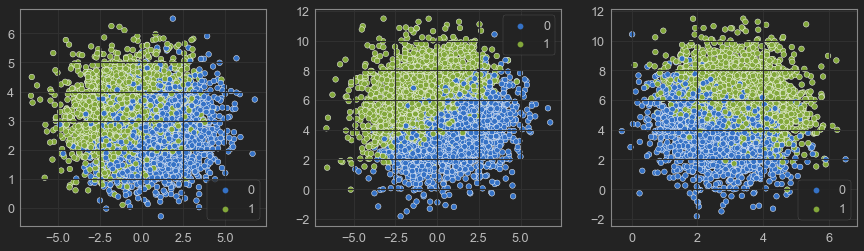

In [36]:
plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = x1, y = x2, hue = y, ax = ax1)
sns.scatterplot(x = x1, y = x3, hue = y, ax = ax2)
sns.scatterplot(x = x2, y = x3, hue = y, ax = ax3)

In [37]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y' : y})
X = df.drop(columns = 'y')
y = df['y']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Train the classifier

In [39]:
# model = LogisticRegression()
model = GaussianNB()
# model = RandomForestClassifier()
# model = XGBClassifier()

In [40]:
model.fit(X_train, y_train)

GaussianNB()

In [41]:
y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [42]:
evaluate_classification(y_test, y_proba[:,1])

Classification result
Accuracy:  0.9720
Precision: 0.9781
Recall:    0.9665
F1:        0.9723
ROC AUC:   0.9976


### Predicts the shifted data

In [43]:
Z = pd.DataFrame({'x1': z1, 'x2': z2, 'x3': z3})

In [44]:
z_proba = model.predict_proba(Z)
z_pred = model.predict(Z)

<AxesSubplot:>

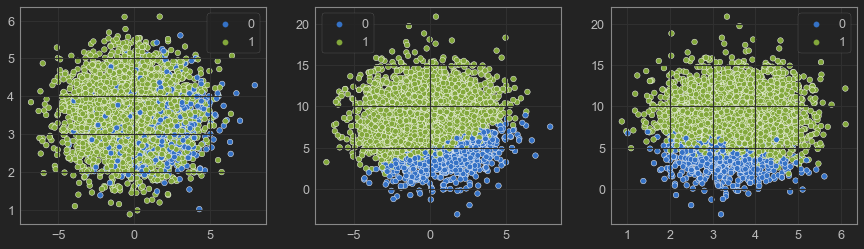

In [45]:
plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = z1, y = z2, hue = z_pred, ax = ax1)
sns.scatterplot(x = z1, y = z3, hue = z_pred, ax = ax2)
sns.scatterplot(x = z2, y = z3, hue = z_pred, ax = ax3)

### Calculates the PSI

#### Using fixed size bins

In [46]:
psi_values_fixed = psi(y_proba[:,1], z_proba[:,1], mode = 'fixed')

In [47]:
psi_values_fixed

array([0.18762291, 0.09442413, 0.08210423, 0.02770555, 0.02168224,
       0.0304856 , 0.01238304, 0.00062298, 0.00209643, 0.51995454])

In [48]:
np.mean(psi_values_fixed)

0.09790816636523815

#### Using quantile bins

In [49]:
psi_values_quantile = psi(y_proba[:,1], z_proba[:,1], mode = 'quantile')

In [50]:
psi_values_quantile

array([0.10485336, 0.11125646, 0.0871549 , 0.06051196, 0.04767393,
       0.031705  , 0.00485043, 0.00963455, 0.013211  , 0.64281158])

In [51]:
np.mean(psi_values_quantile)

0.11136631590912889

#### Saves the data for the CSI example

In [52]:
df_test = X_test.copy()
df_test['y'] = y_test
df_test['pred'] = y_pred
df_test['proba'] = y_proba[:,1]

In [53]:
Z['pred'] = z_pred
Z['proba'] = z_proba[:,1]

In [54]:
df_test.to_csv("data_test_classification.csv", sep = ";", index = False)
Z.to_csv("Z_classification.csv", sep = ";", index = False)